# Week4授業前課題2 住宅価格の予測

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # ファイルの読み込み先のpath指定する時に必要

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error # 平均二乗誤差

from sklearn.svm import SVR #SVM
from sklearn.tree import DecisionTreeRegressor # 決定木
from sklearn.ensemble import RandomForestRegressor# ランダムフォレスト


In [2]:
# データが格納されている作業ディレクトリまでパス指定
# 自分の今いる場所からのpathで良いらしい
# os ってのも忘れないでね！

# os.chdir('../week03')

# House_Prices = pd.read_csv('train.csv')
# House_Prices.head()

In [3]:
data = pd.read_csv("../../data/house-prices-advanced-regression-techniques/train.csv")
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [4]:
X = data.loc[:,['GrLivArea','YearBuilt']]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


### 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

#### 分析

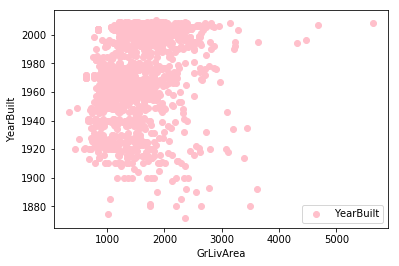

In [5]:
# GrLivArea と YearBuilt で散布図プロット して分析
plt.scatter(X["GrLivArea"],X["YearBuilt"],c = "pink")
plt.xlabel("GrLivArea")
plt.ylabel("YearBuilt")
plt.legend()
plt.show()

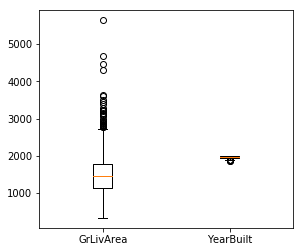

In [6]:
# GrLivArea と YearBuilt で箱ひげ図で分析
plt.subplots(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot([X["GrLivArea"],X["YearBuilt"]])
plt.xticks([1,2],["GrLivArea","YearBuilt"])
# plt.ylabel("Year")
# plt.legend()
plt.show()

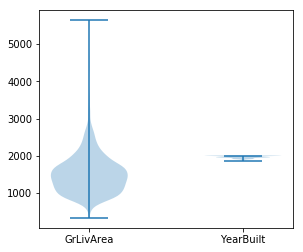

In [7]:
# GrLivArea と YearBuilt でバイオリン図で分析
plt.subplots(figsize=(10,4))

plt.subplot(1,2,1)
plt.violinplot([X["GrLivArea"],X["YearBuilt"]])
plt.xticks([1,2],["GrLivArea","YearBuilt"])
# plt.ylabel("Year")
# plt.legend()
plt.show()

#### 前処理

In [8]:
# 前処理：特徴量と目的変数に分ける
X_v = X.values
print(type(X_v))
print(X_v.shape)
X_v

<class 'numpy.ndarray'>
(1460, 2)


array([[1710, 2003],
       [1262, 1976],
       [1786, 2001],
       ...,
       [2340, 1941],
       [1078, 1950],
       [1256, 1965]])

In [9]:
# 前処理：特徴量と目的変数に分ける
y = data.loc[:,['SalePrice']].values
print(type(y))
print(y.shape)
y

<class 'numpy.ndarray'>
(1460, 1)


array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [10]:
# 前処理：訓練用データと検証用データに分類
X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size = 0.25, random_state=42)

In [11]:
# 標準化
sc = StandardScaler()
X_tr_sc = sc.fit_transform(X_train)
X_ts_sc = sc.fit_transform(X_test)

#### 学習（線形回帰）

In [12]:
reg = LinearRegression()
reg.fit(X_tr_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 推定

In [20]:
y_pred = reg.predict(X_ts_sc)

print("推定\n{}".format(y_pred[:4]))
print("正解\n", y[:4])

推定
[[134376.93729272]
 [314865.80458163]
 [ 90458.61524867]
 [172484.9720658 ]]
正解
 [[208500]
 [181500]
 [223500]
 [140000]]


#### 評価（線形回帰で学習した場合、平均事情誤差で評価するのが一般的）

In [14]:
# 線形回帰を平均事情誤差で評価
mse_reg = mean_squared_error(y_test, y_pred)
print("MSE:{}".format(mse_reg))

MSE:2314294633.127252


#### 可視化

X_test.values# Xはpandasだと処理できないので、valuesにする

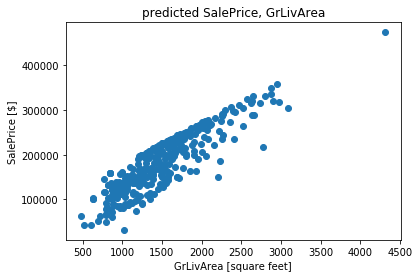

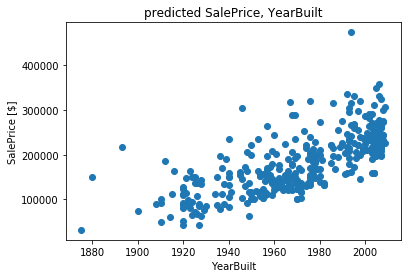

In [15]:
# 散布図で可視化

plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test.values[:, 0], y_pred) # Xはpandasだと処理できないので、valuesにする
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test.values[:, 1], y_pred)
plt.show()

#### 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

#### SVM

推定結果：
[164849.96489578 165163.33957083 164845.88864396 164974.03353781]
正解：
[[191000]
 [181000]
 [105000]
 [139900]]
MSE:7169618422.273447


/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


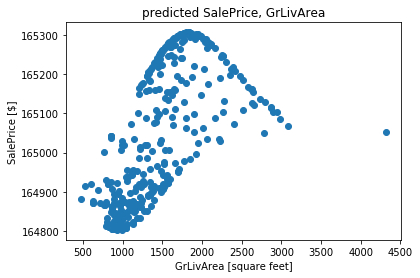

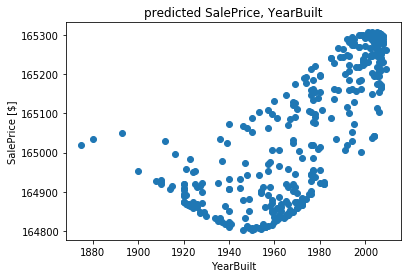

In [16]:
svm = SVR()

# 学習
svm.fit(X_tr_sc, y_train)

# 推定
y_pred_svm = svm.predict(X_ts_sc)

print("推定結果：\n{}".format(y_pred_svm[:4]))
print("正解：\n{}".format(y_train[:4]))

# 評価
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("MSE:{}".format(mse_svm))

# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test.values[:, 0], y_pred_svm) # Xはpandasだと処理できないので、valuesにする
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test.values[:, 1], y_pred_svm)
plt.show()

考察：波のような形になった。  
GrLivAreaが広くなればなるほど価格が高くなるようなグラフを予想したがそうなりませんでした。  
反対にYearBuiltは新築なほど販売価格が大きくなりました。
svmの平均自乗誤差は  
MSE:7169618422.273447でした。  
MSE:2314294633.127252は線形回帰の値です。  
この二つを比べるとsvmは大きな値になりました。  
平均２乗誤差はその名の通り誤差の事です。  
つまり線形回帰と比べてsvmは誤差が大きく、モデルとして良くないと言える。  

#### 決定木

推定結果：
[160000. 412500.  55000.  98000.]
正解：
[[208500]
 [181500]
 [223500]
 [140000]]
MSE:3089441108.7407155


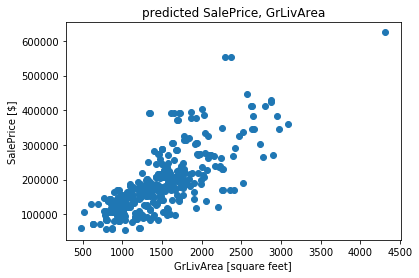

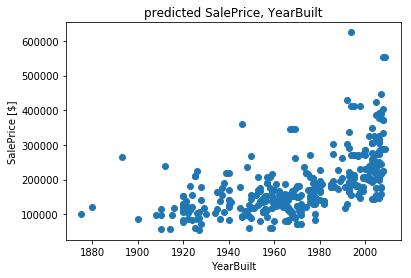

In [17]:
dtr = DecisionTreeRegressor()

# 学習
dtr.fit(X_tr_sc, y_train)

# 推定
y_pred_dtr = dtr.predict(X_ts_sc)
print("推定結果：\n{}".format(y_pred_dtr[:4]))
print("正解：\n{}".format(y[:4]))

# 評価
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("MSE:{}".format(mean_squared_error(y_test, y_pred_dtr)))

# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test.values[:, 0], y_pred_dtr) # Xはpandasだと処理できないので、valuesにする
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test.values[:, 1], y_pred_dtr)
plt.show()

考察：
GrLivArea,YearBuilt共に広いほど、築浅な程価格が高くなるという予想通りの結果になりました。  
MSE:3154392684.9050994：決定木  
MSE:2314294633.127252は線形回帰の値です。  
svmよりも誤差は小さいが線形回帰の方がまだ誤差は小さい事がわかりました。

#### ランダムフォレスト

推定値：[140200.  416552.4  94330.  144980. ]
正解：[[208500]
 [181500]
 [223500]
 [140000]]
MSE:2089056948.5441058


/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


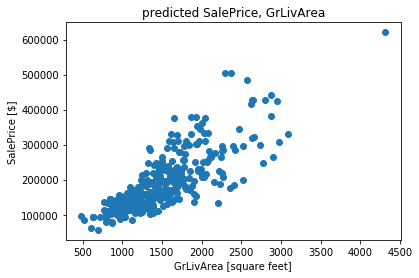

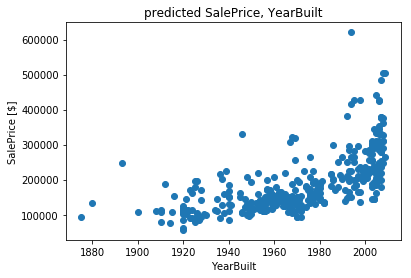

In [18]:
rfr = RandomForestRegressor()

# 学習
rfr.fit(X_tr_sc, y_train)

# 推定
y_pred_rfr = rfr.predict(X_ts_sc)
print("推定値：{}".format(y_pred_rfr[:4]))
print("正解：{}".format(y[:4]))

# 評価
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print("MSE:{}".format(mean_squared_error(y_test, y_pred_rfr)))

# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test.values[:, 0], y_pred_rfr) # Xはpandasだと処理できないので、valuesにする
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test.values[:, 1], y_pred_rfr)
plt.show()


考察：  
GrLivArea,YearBuilt共に広いほど、築浅な程価格が高くなるという予想通りの結果になりました。  
決定木に似ているグラフになりました。  
  
MSE:2192288163.074248：ランダムフォレスト  
MSE:2314294633.127252は線形回帰の値です。  
線形回帰よりも誤差が小さくなりました。  
全てのモデルで比較するとランダムフォレストが一番良いと言えそう。

#### 指標値を表にする

In [19]:
# mseをリストにしてpandasに変換する
# mseをリスト化
mse_list = []
mse_list.append(mse_reg)
mse_list.append(mse_svm)
mse_list.append(mse_dtr)
mse_list.append(mse_rfr)

print(mse_list)

# リストをpanndasへ変換
mse_list1 = [mse_list]#二次元のリストに変換しないとpandasへ変換出来ない
df3 = pd.DataFrame(mse_list1,
                 index=['mse'],
                 columns=['線形回帰', 'svm', '決定木', 'ランダムフォレスト'])
df3

[2314294633.127252, 7169618422.273447, 3089441108.7407155, 2089056948.5441058]


,線形回帰,svm,決定木,ランダムフォレスト
mse,2.314295e+09,7.169618e+09,3.089441e+09,2.089057e+09


考察：  
ランダムフォレストの平均2乗誤差が一番良いモデルでした。  
svmは良いと言われていますがここではあまり効果的では無さそうです。

#### 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。